In [1]:
import utils
import environment
import copy

utils.seed_all(seed = 0)

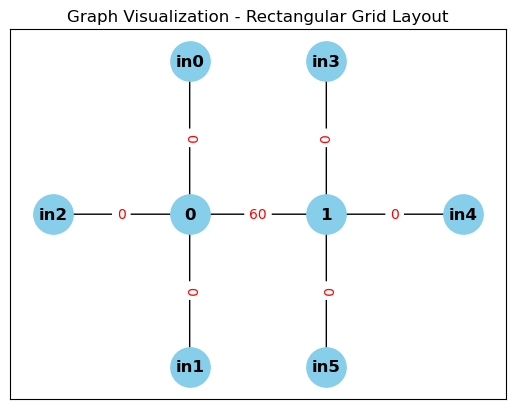

In [2]:
# test env
duration = 100
lanes = ['F', 'L', 'R']
directions = ['N', 'E', 'S', 'W']
A = [(['E', 'W'], ['F']), (['E', 'W'], ['L']), 
    (['N', 'S'], ['F']), (['N', 'S'], ['L']), 
    (['E'], ['F', 'L']), (['W'], ['F', 'L']), 
    (['N'], ['F', 'L']), (['S'], ['F', 'L'])]
vehicle_parameters = {'duration': duration, 'min_speed': 2.22, 'max_speed': 13.33, 
                      'lanes': lanes, 'arrival_rates': {'E': 5/60, 'N': 5/60, 'W': 10/60, 'S': 7/60}}
intersection_parameters = {'duration': duration, 'action_duration': 10, 
                           'Lanes': lanes, 'Directions': directions, 'A': A, 
                           'gamma': 0.95, 'alpha': 0.1, 'espilon': 0.1, 'is_mem_based':False,  
                           'is_dynamic_action_duration': False, 'dynamic_action_duration': 4, 
                           'reward_function': utils.calculate_reward_default, 'n_vehicle_leaving_per_lane': 1}
graph_structure_params = {'rows': 1, 'cols': 2, 'length': 60}
communcation_parameters = {'A': A, 'mu': 0.0, 'sigma': 1.0, 'tau': 0.0}



env_SARSA = environment.Env(duration=duration, update_type= 'partial', comm_based = False, graph_structure_parameters=graph_structure_params, 
          vehicle_parameters=vehicle_parameters, intersection_parameters=intersection_parameters,
          communication_parameters=communcation_parameters)


In [3]:
env_SARSA.SARSA_run(n_episodes=1)


In [4]:
test_graph, test_vehicles = env_SARSA.generate_test_structures(graph_structure_parameters=graph_structure_params, 
                                                               vehicle_parameters=vehicle_parameters, 
                                                               intersection_parameters=intersection_parameters)

In [5]:
test_vehicles_mem = copy.deepcopy(test_vehicles)
test_graph_mem = copy.deepcopy(test_graph)

W: total average weight time per lane: 0.4186916704185333s
average weight time per node in s (nan means no cars arrived):
 {'0': 0.41671568382535173, '1': 0.4206112002519096}


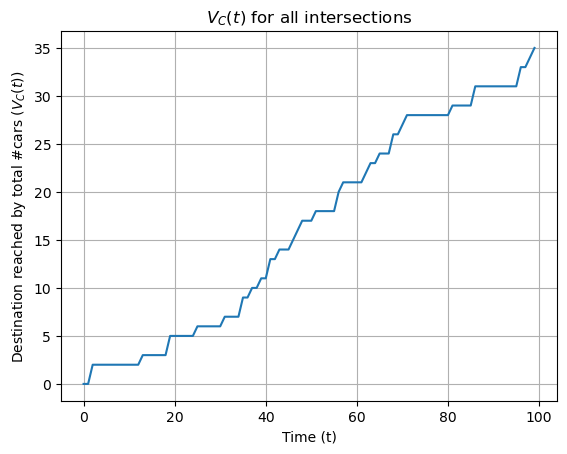

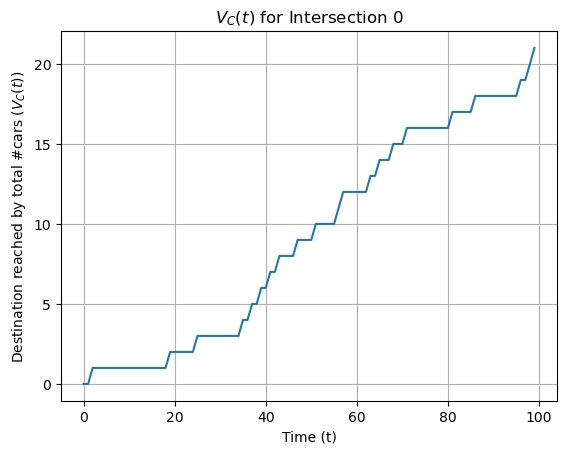

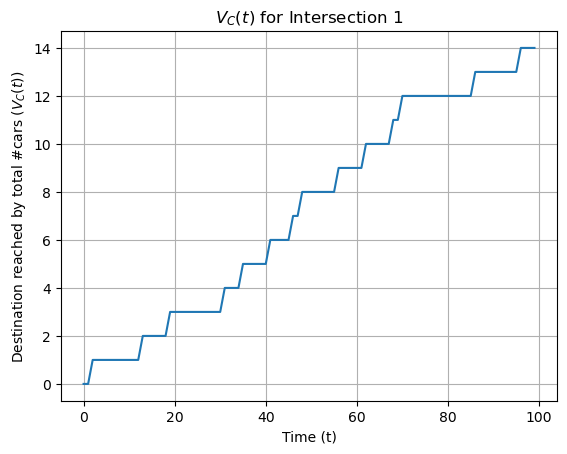

In [6]:
env_SARSA.test(test_graph=test_graph, test_vehicles=test_vehicles, update_epoch = 25)
env_SARSA.display_congestion_metric()

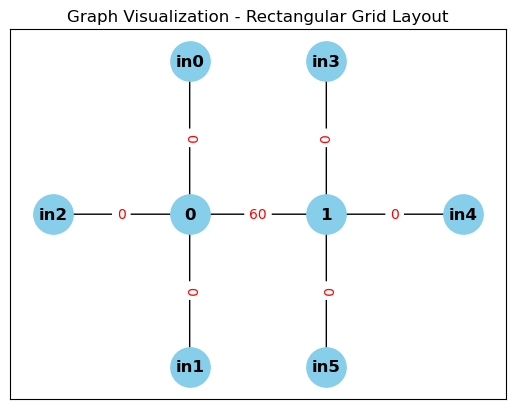

Images combined and saved as 'plots/memory_based/combined/Intersection0.png'


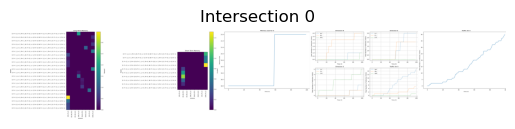

Images combined and saved as 'plots/memory_based/combined/Intersection1.png'


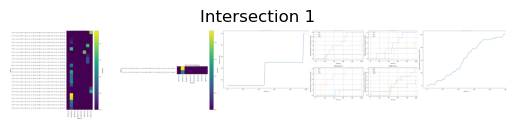

W: total average weight time per lane: 4.744115872875546s
average weight time per node in s (nan means no cars arrived):
 {'0': 5.186983527237117, '1': 4.288946339226154}


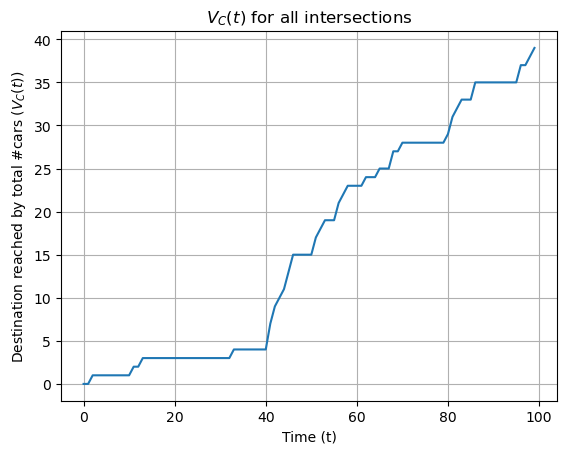

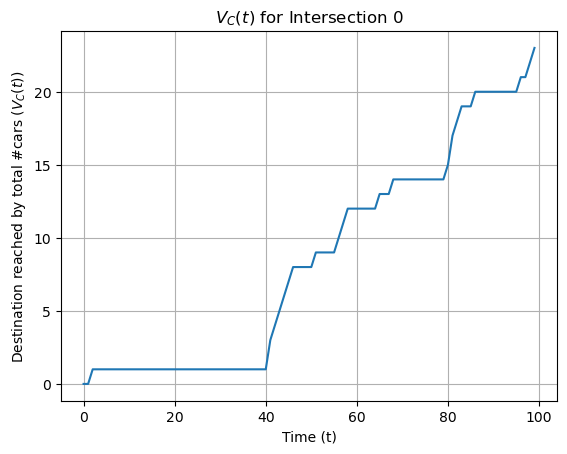

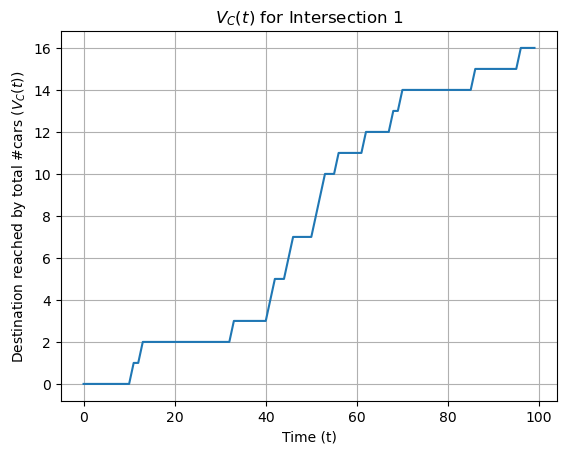

In [7]:
test_graph.set_memory_based(is_mem_based=True)

env_SARSA.test(test_graph=test_graph, test_vehicles=test_vehicles, update_epoch = 25)
env_SARSA.plot_env()
env_SARSA.display_congestion_metric()

In [8]:
import pandas as pd


In [9]:
a = pd.DataFrame({'a':[1,3,2,1], 'b': [1,1,1,1]})
b = pd.DataFrame({'a':[11,13,12,21], 'b': [121,12,121,14]})
a['state'] = a.index
b['state'] = b.index

In [10]:
a.set_index('state')
a.index.name

In [11]:
c = pd.merge(a, b, on = 'state', how = 'inner', suffixes = ['', '_old'])
c.loc[:, ~c.columns.str.endswith('_old')]

,a,b,state
0,1,1,0
1,3,1,1
2,2,1,2
3,1,1,3


In [12]:
a['state'].apply(lambda x: x+1)

0    1
1    2
2    3
3    4
Name: state, dtype: int64

In [13]:
a

,a,b,state
0,1,1,0
1,3,1,1
2,2,1,2
3,1,1,3


In [14]:
import numpy as np
b = np.array([0, 0, 0, 0])

In [15]:
c = '-'.join(b.astype(str))

In [16]:
np.array(c.split('-')).astype(int)

array([0, 0, 0, 0])